In [1]:
import os
os.chdir('build/')
from runner_utils import *
from globals import *
from stats_utils import *
import matplotlib.pyplot as plt
%matplotlib inline 



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import HTML


In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [5]:
def type_crisis(res):
    crisis_starts, crisis_ends = find_intersection(res['u'][2001:], 0.1)
    if crisis_ends.size > 1:
        ## There is indeed a crisis 
        if crisis_starts.size > 1:
        # multiple crises
        # first crisis length = crisis_ends[1] - crisis_starts[0]
            print("First crisis length = ", crisis_ends[1] - crisis_starts[0])
        # is there a second crisis
            if crisis_ends.size >2:
            # there is a second crisis with finite time 
                print("Second crisis. Start = {} length ={} ".format(crisis_starts[1], crisis_ends[2] - crisis_starts[1]))
            else:
            # Crisis is infinitely long
                print("Second crisis is infinite. Second crisis start = ", crisis_starts[1])
        else:
        # single crisis
            print("Single crisis. Length =  ", crisis_ends[1] - crisis_starts[0])
    else:
        if crisis_starts.size < 1:
            print("No crisis", crisis_ends)
        else:
            print("Infinite crisis")

In [51]:
def plot_letter(res,plot_object, fd=2000, td=2500):
    ax[0].plot(res['u'][fd:td])
    ax[1].plot(res['bust-af'][fd:td])
    
    ax[0].set_title('U-rate')
    ax[1].set_title('Bust')

# L-shape 



In [66]:
shockflag = 1
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end', 'gpolicy', 'ptol', 'adapt']
param_values = [shockflag,  0.3, 2008, 2000, 2008, 1, 3, 1]
os.system('make covid')
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]
type_crisis(res)

Infinite crisis


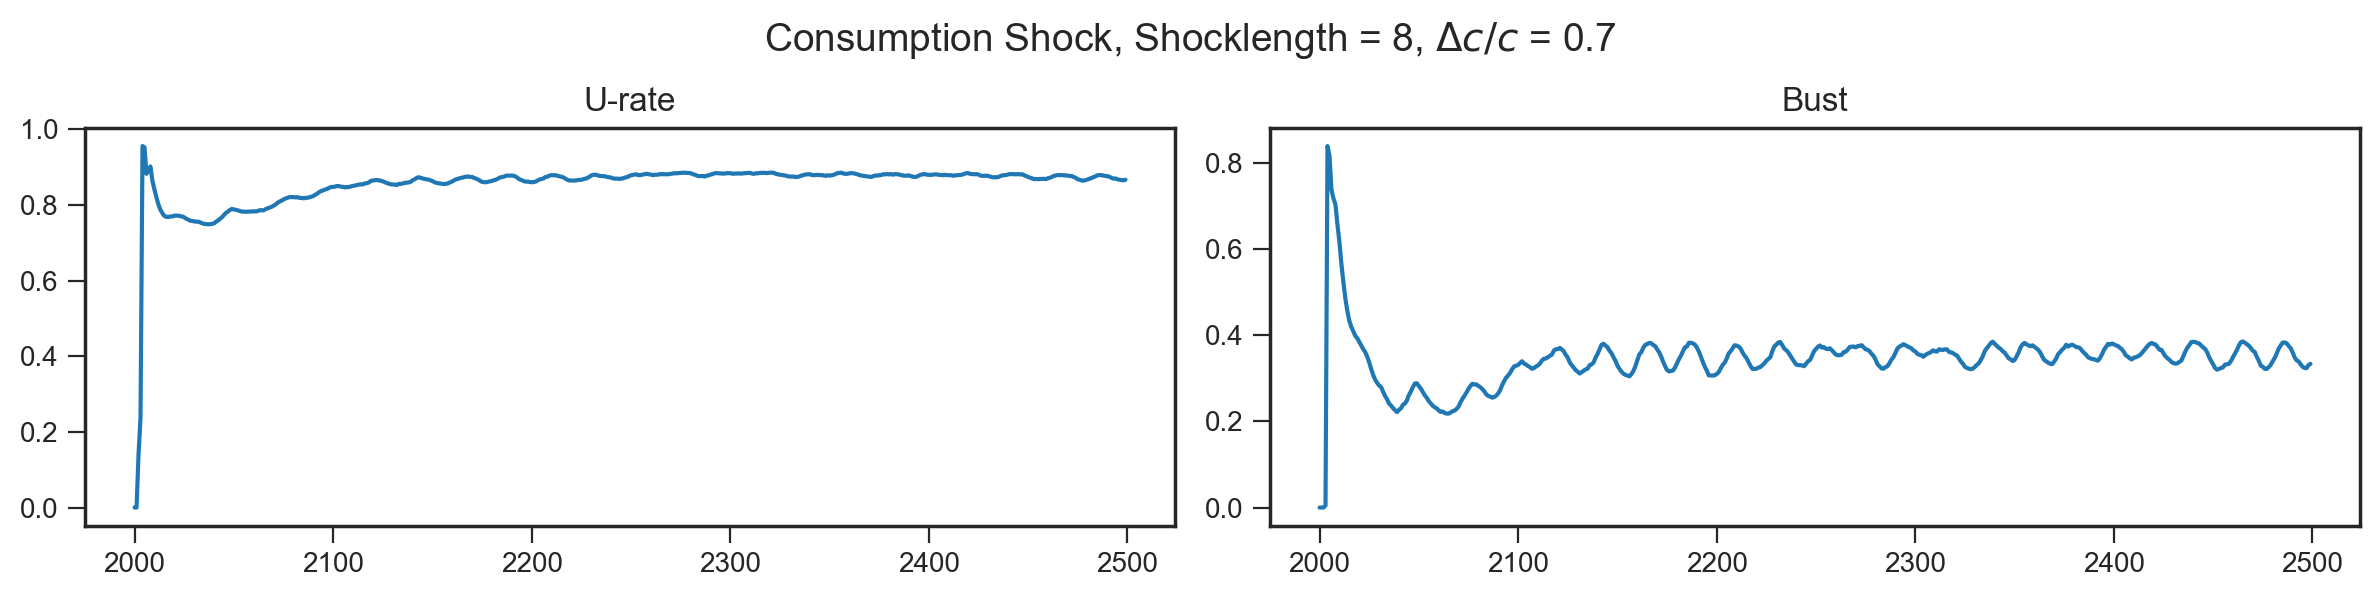

In [67]:
f, ax = plt.subplots(1,2, dpi=200, figsize=(12,3))
plot_letter(res, ax)
plt.suptitle('Consumption Shock, Shocklength = {}, $\Delta c/ c$ = {}'.format(8, 1-0.3), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

In [68]:
shockflag = 3
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','seed', 'gpolicy', 'ptol', 'adapt']
param_values = [shockflag,  0.7, 2003, 2000, 2008, 1, 1, 3, 1]
os.system('make covid')
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]
type_crisis(res)

Infinite crisis


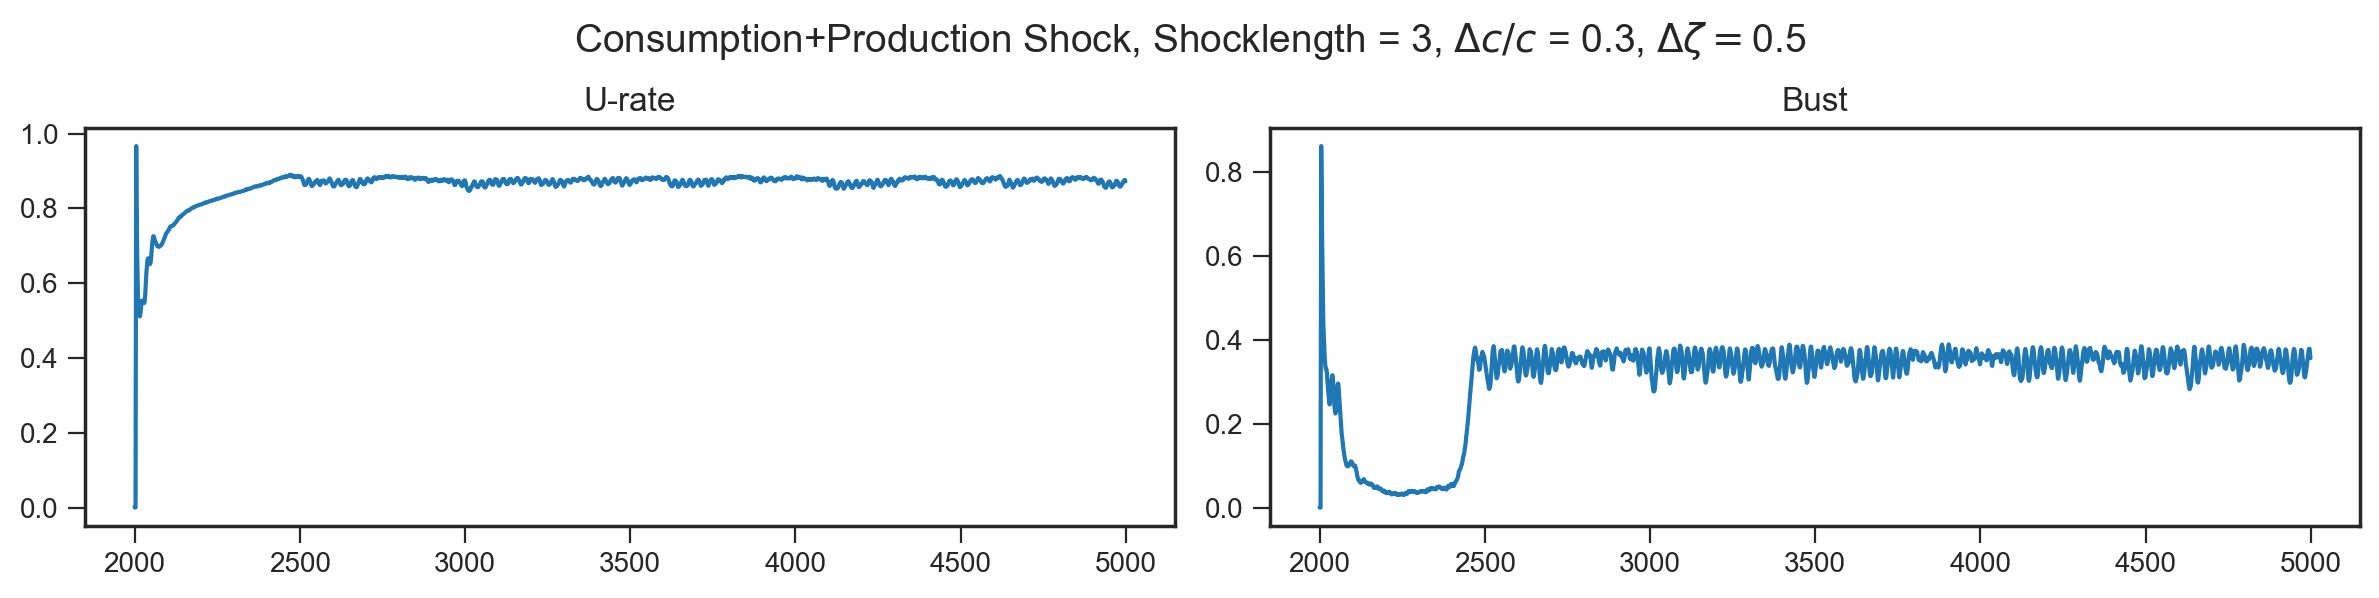

In [72]:
f, ax = plt.subplots(1,2, dpi=200, figsize=(12,3))
plot_letter(res, ax, td=5000)
plt.suptitle('Consumption+Production Shock, Shocklength = {}, $\Delta c/ c$ = {}, $\Delta \zeta = ${}'.format(3, 0.3, 0.5), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

# U shape 

In [73]:
shockflag = 3
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','seed', 'gpolicy', 'ptol', 'adapt']
param_values = [shockflag,  0.5, 2003, 2000, 2008, 1, 1, 3, 1]
os.system('make covid')
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]
type_crisis(res)

Single crisis. Length =   1300


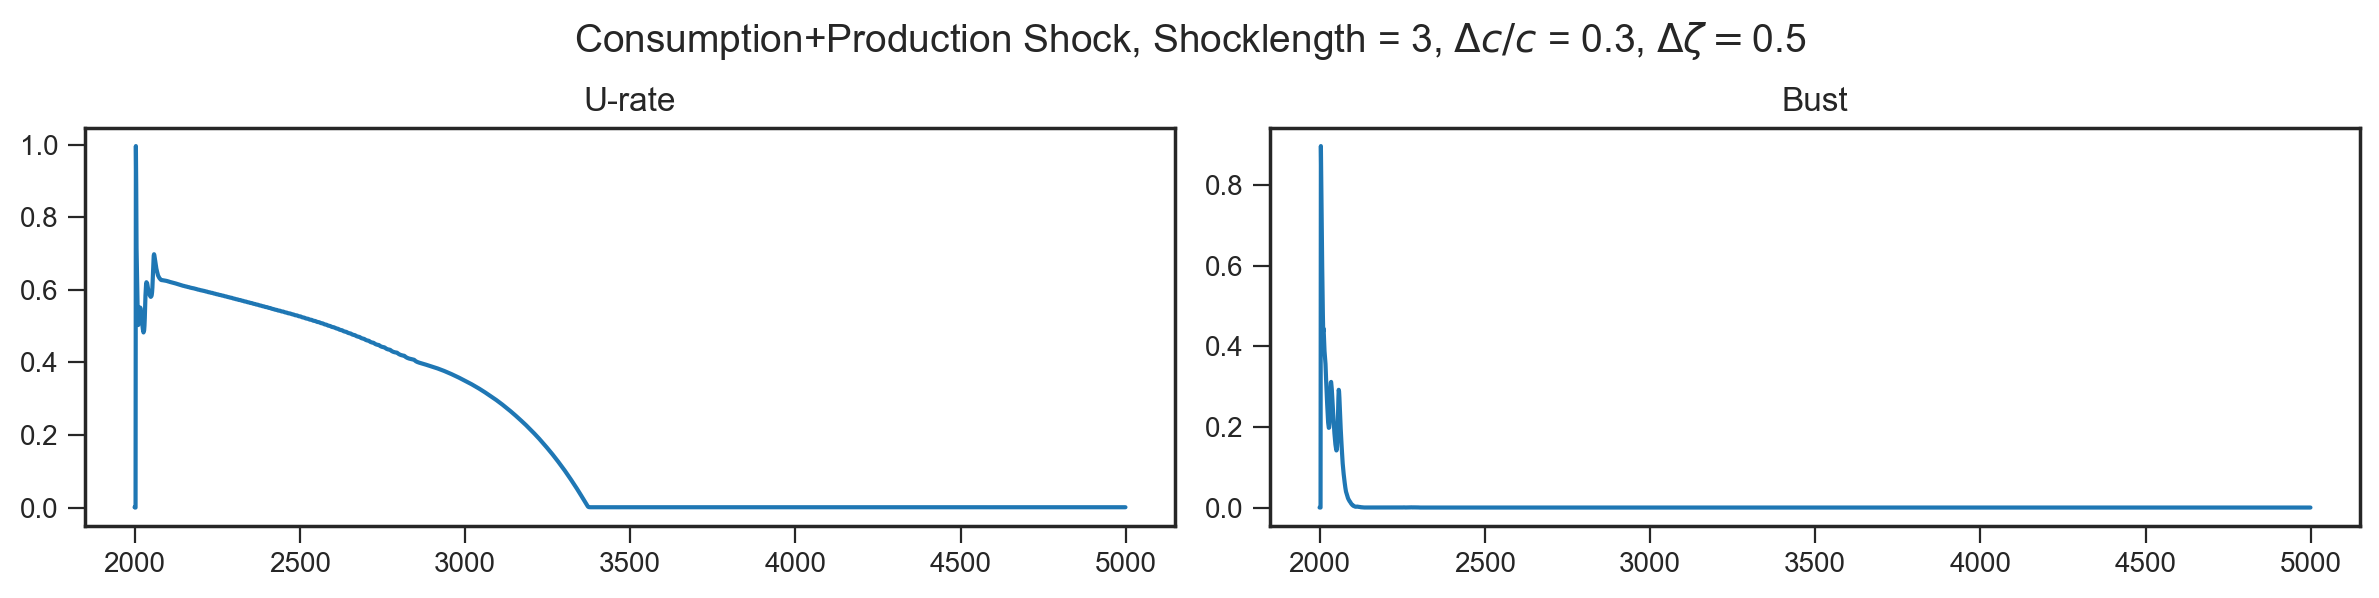

In [74]:
f, ax = plt.subplots(1,2, dpi=200, figsize=(12,3))
plot_letter(res, ax, td=5000)
plt.suptitle('Consumption+Production Shock, Shocklength = {}, $\Delta c/ c$ = {}, $\Delta \zeta = ${}'.format(3, 0.5, 0.5), fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

In [76]:
shockflag = 6
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','seed', 'gpolicy', 'ptol', 'adapt']
param_values = [shockflag,  0.7, 2003, 2000, 2008, 1, 0, 3, 1]
os.system('make covid')
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]
type_crisis(res)

Single crisis. Length =   1891


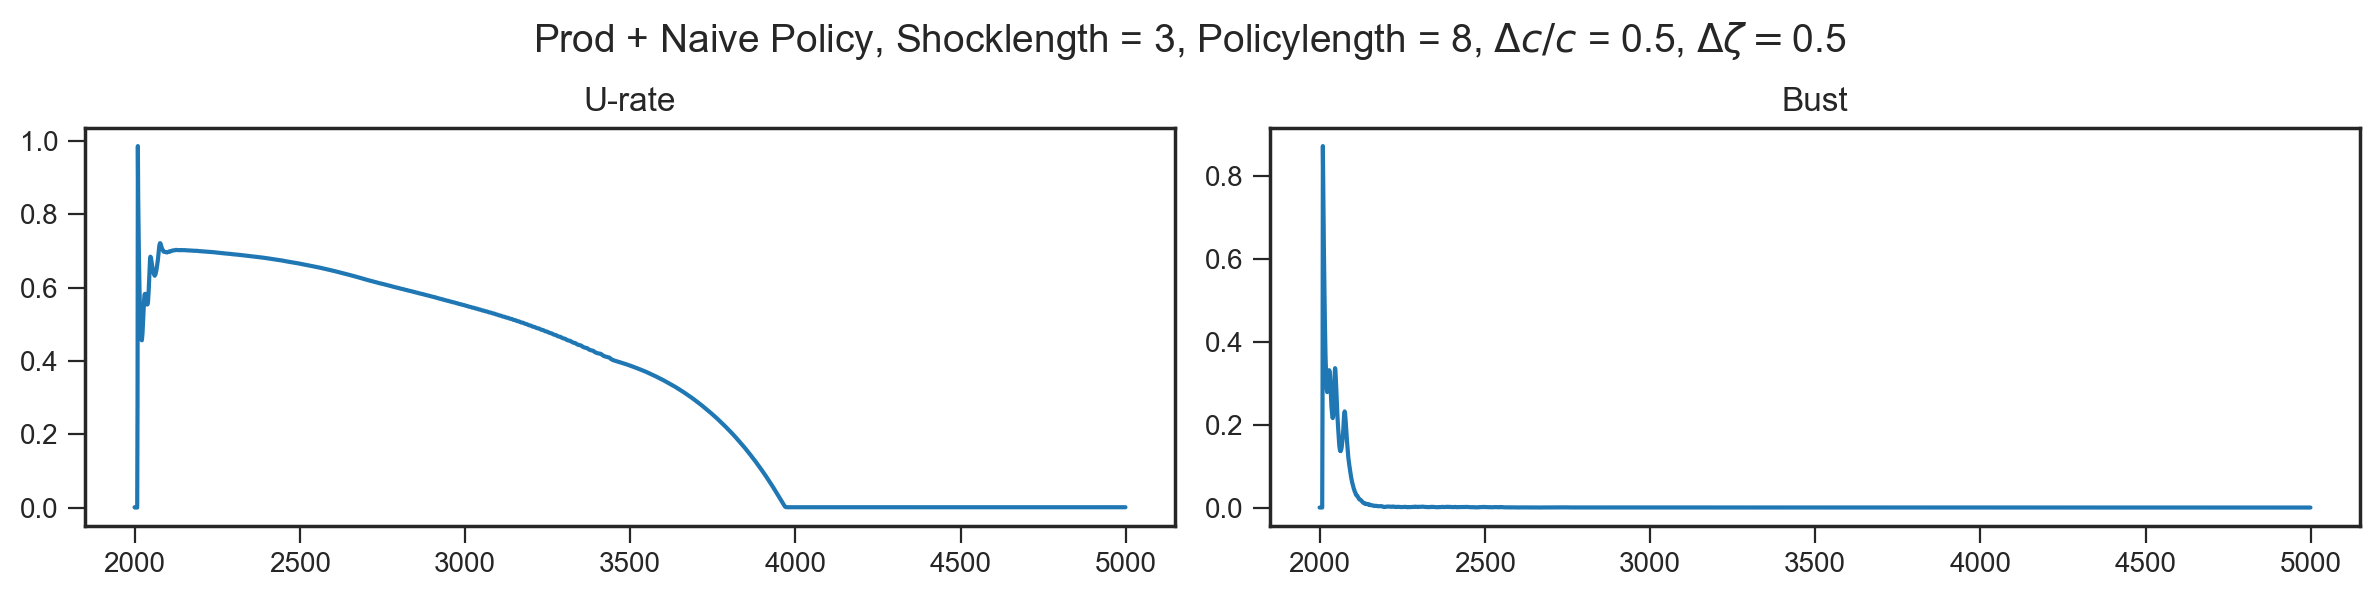

In [78]:
f, ax = plt.subplots(1,2, dpi=200, figsize=(12,3))
plot_letter(res, ax, td=5000)
plt.suptitle('Prod + Naive Policy, Shocklength = {}, Policylength = {}, $\Delta c/ c$ = {}, $\Delta \zeta = ${}'.format(3, 8,0.5, 0.5),
             fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

# Swoosh ? 

In [88]:
shockflag = 6
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','seed', 'helico']
param_values = [shockflag,  0.5, 2003, 2000, 2008, 0,1]
os.system('make covid')
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]
type_crisis(res)

First crisis length =  8
Second crisis. Start = 32 length =3 


Text(0.5, 1.0, 'Total output')

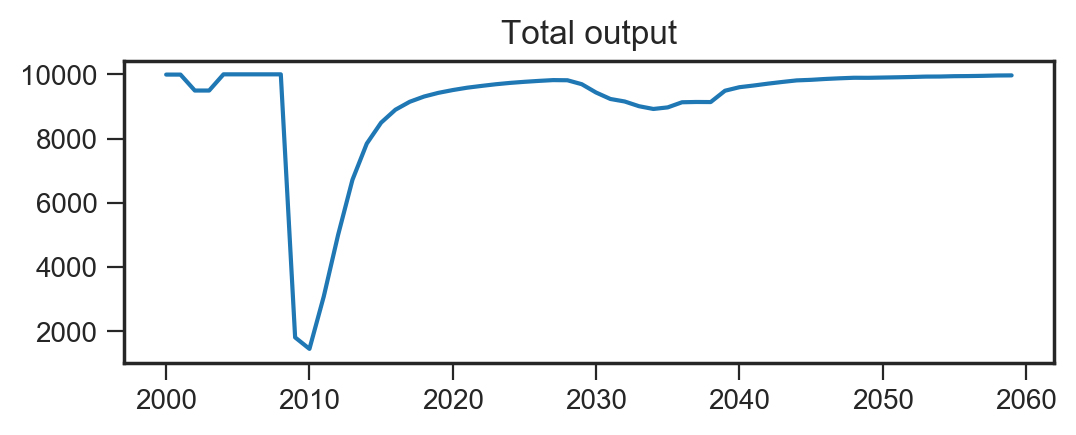

In [95]:
f,ax = plt.subplots(1,1,dpi=200, figsize=(6,2))
ax.plot(res['Ytot'][2000:2060])
ax.set_title('Total output')

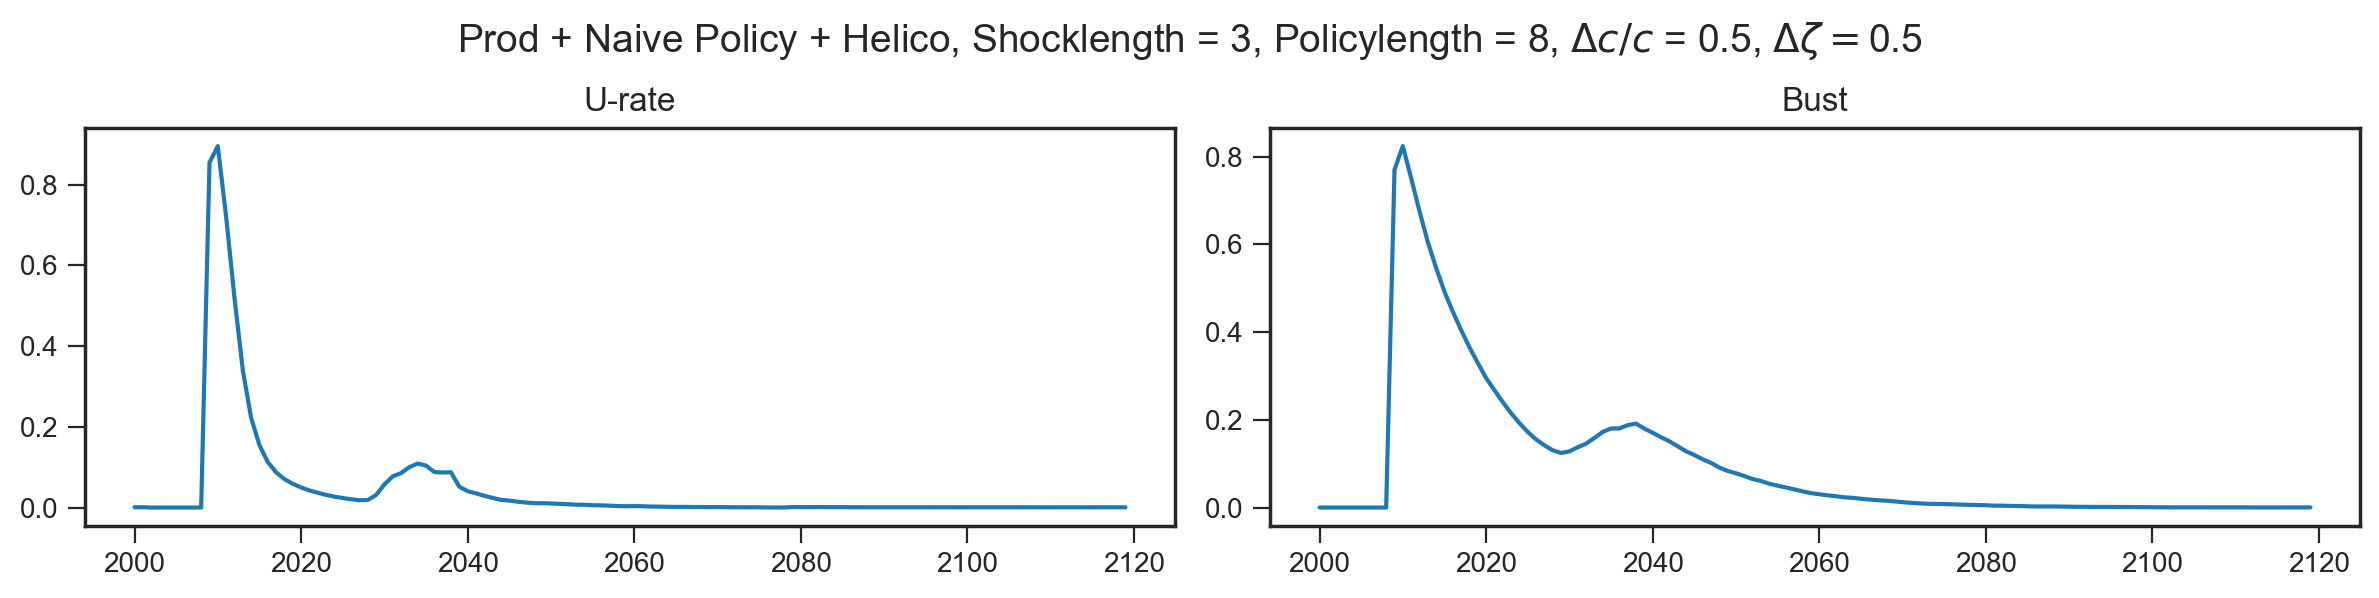

In [92]:
f, ax = plt.subplots(1,2, dpi=200, figsize=(12,3))
plot_letter(res, ax, td=2120)
plt.suptitle('Prod + Naive Policy + Helico, Shocklength = {}, Policylength = {}, $\Delta c/ c$ = {}, $\Delta \zeta = ${}'.format(3, 8,0.5, 0.5),
             fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

# V shape

In [138]:
shockflag = 4
param_names = ['shockflag','factor','zfactor',  't_end', 'policy_start', 'policy_end','seed', 'helico']
param_values = [shockflag,  0.5, 0.7, 2005, 2000, 2005, 1,0]
os.system('make covid')
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]
type_crisis(res)

Single crisis. Length =   4


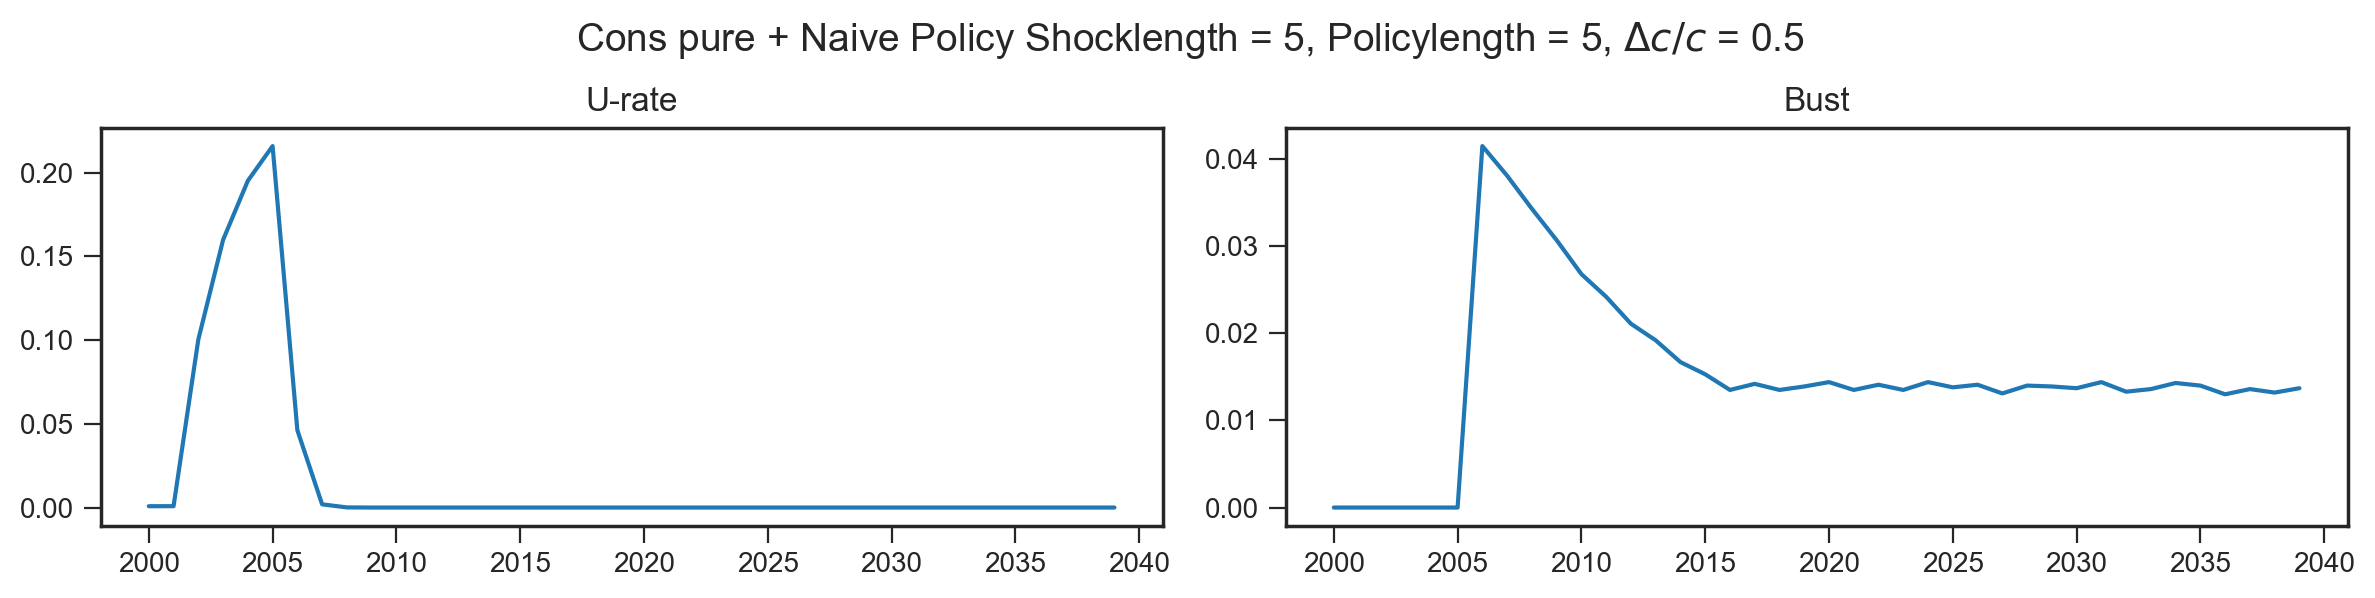

In [142]:
f, ax = plt.subplots(1,2, dpi=200, figsize=(12,3))
plot_letter(res, ax, td=2040)
plt.suptitle('Cons pure + Naive Policy Shocklength = {}, Policylength = {}, $\Delta c/ c$ = {}'.format(5, 5,0.5,),
             fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

# W-shape

In [154]:
shockflag = 4
param_names = ['shockflag','factor','zfactor',  't_end', 'policy_start', 'policy_end','seed', 'helico']
param_values = [shockflag,  0.3, 0.7, 2006, 2000, 2008, 0,0]
os.system('make covid')
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]
type_crisis(res)

First crisis length =  5
Second crisis. Start = 8 length =1493 


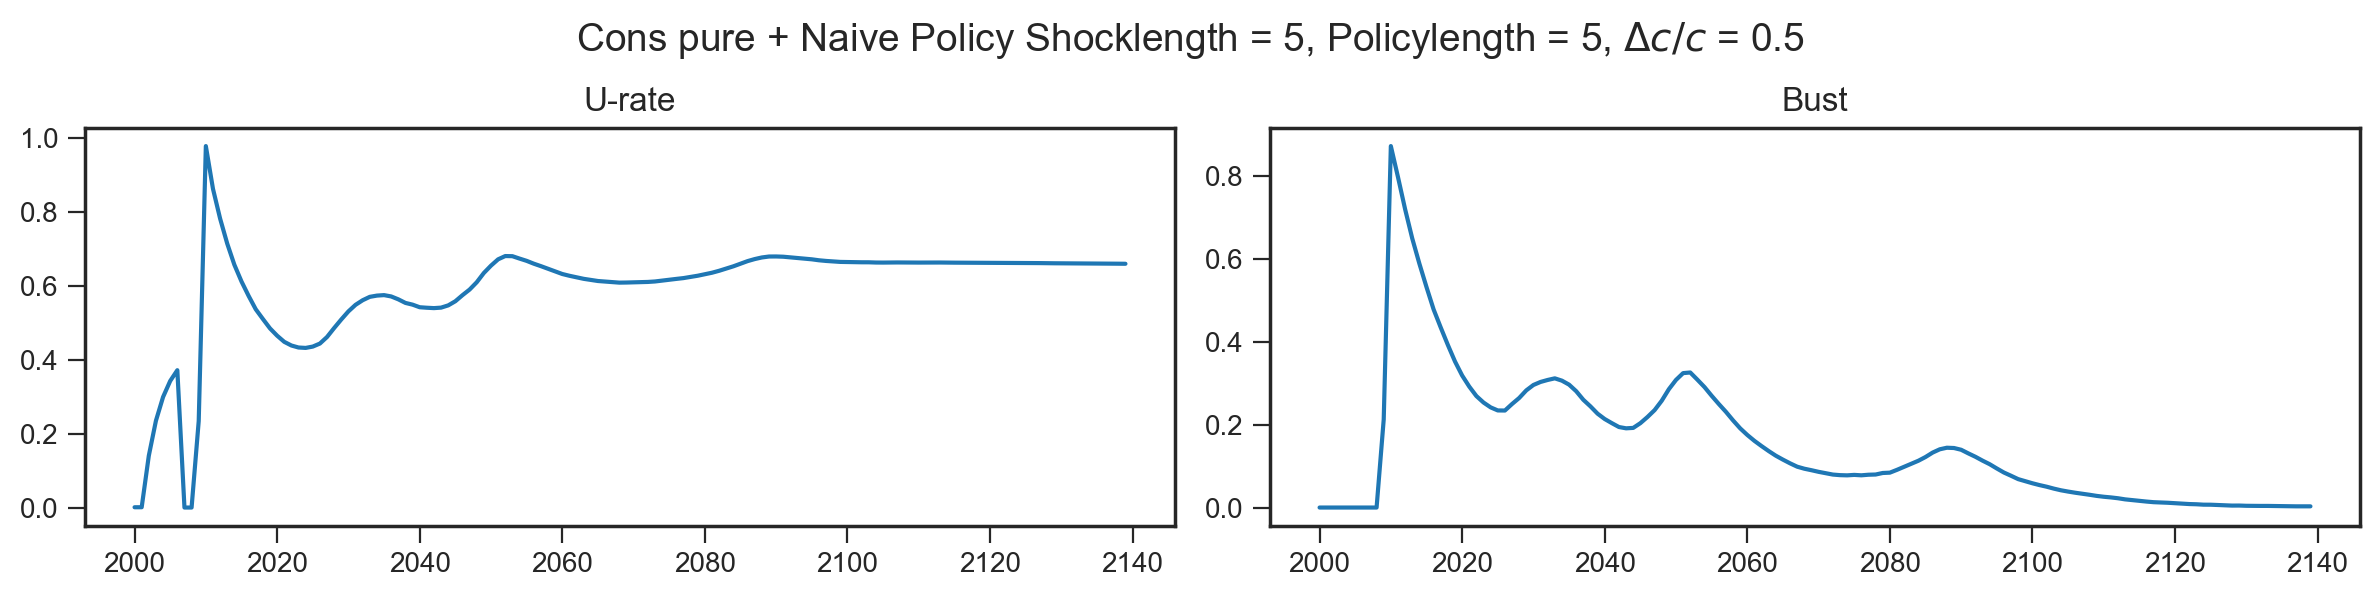

In [155]:
f, ax = plt.subplots(1,2, dpi=200, figsize=(12,3))
plot_letter(res, ax, td=2140)
plt.suptitle('Cons pure + Naive Policy Shocklength = {}, Policylength = {}, $\Delta c/ c$ = {}'.format(5, 5,0.5,),
             fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

Text(0.5, 1.0, '$\\langle \\Phi \\rangle$, Dotted line end of naive policy')

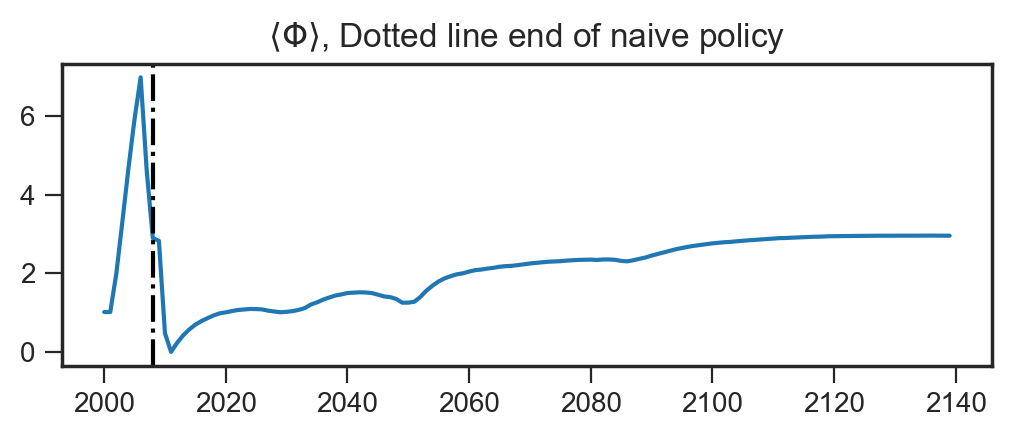

In [163]:
f, ax = plt.subplots(1,1, dpi=200, figsize=(6,2))
ax.plot(res['frag'][2000:2140])
ax.axvline(x = 2008, ls = '-.', c = "k")
ax.set_title('$\\langle \\Phi \\rangle$, Dotted line end of naive policy')

## Transform W into V by using adaptive policy 

As long as $\langle \Phi \rangle > \Theta_{0}-1$, we continue to apply the policy that $\Theta = \langle \Phi \rangle + 1$. This makes the policy intervention longer but we prevent further crises. 

This is especially interesting since the naive policy by abruptly cutting the debt limit leads to the second, longer crisis. 



In [165]:
shockflag = 4
param_names = ['shockflag','factor','zfactor',  't_end', 'policy_start', 'policy_end','gpolicy', 'adapt','helico']
param_values = [shockflag,  0.3, 0.7, 2006, 2000, 2008, 1,1]
os.system('make covid')
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]
type_crisis(res)


Single crisis. Length =   5


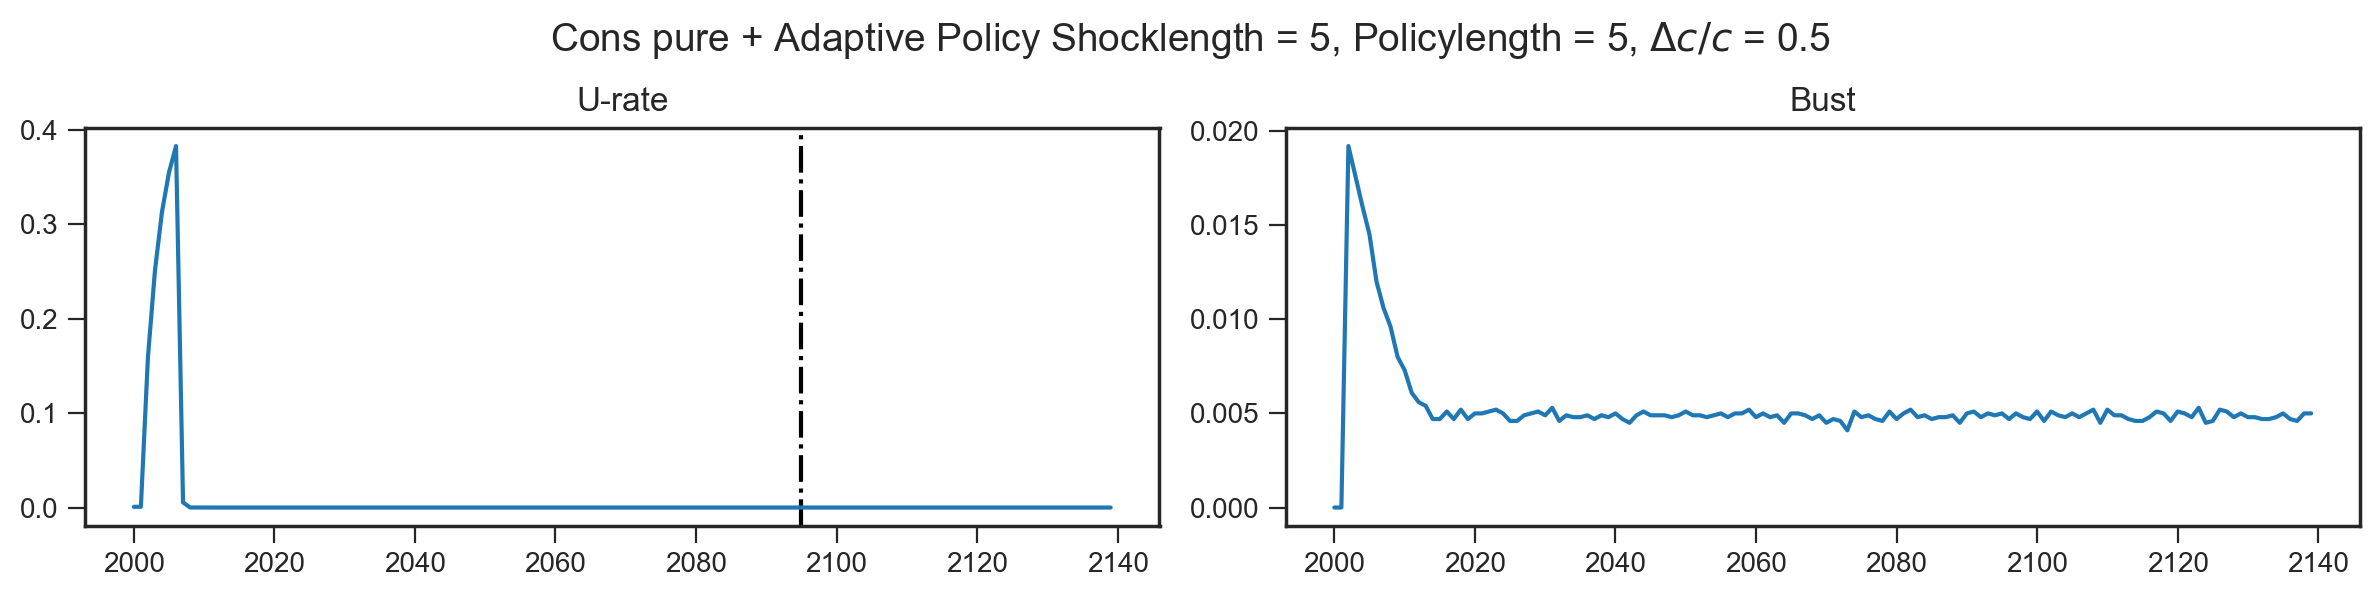

In [168]:
f, ax = plt.subplots(1,2, dpi=200, figsize=(12,3))
ax[0].axvline(x = res['true_end'].iloc[-1], c = "k", ls = '-.')
plot_letter(res, ax, td=2140)
plt.suptitle('Cons pure + Adaptive Policy Shocklength = {}, Policylength = {}, $\Delta c/ c$ = {}'.format(5, 5,0.5,),
             fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

Text(0.5, 1.0, '$\\langle \\Phi \\rangle$, Dotted line end of adaptive policy')

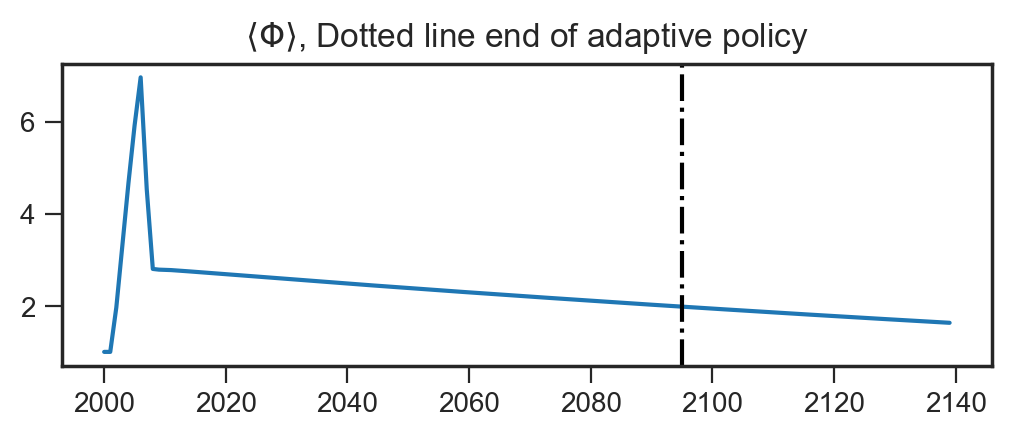

In [172]:
f, ax = plt.subplots(1,1, dpi=200, figsize=(6,2))
ax.plot(res['frag'][2000:2140])
ax.axvline(x = res['true_end'].iloc[-1], ls = '-.', c = "k")
ax.set_title('$\\langle \\Phi \\rangle$, Dotted line end of adaptive policy')